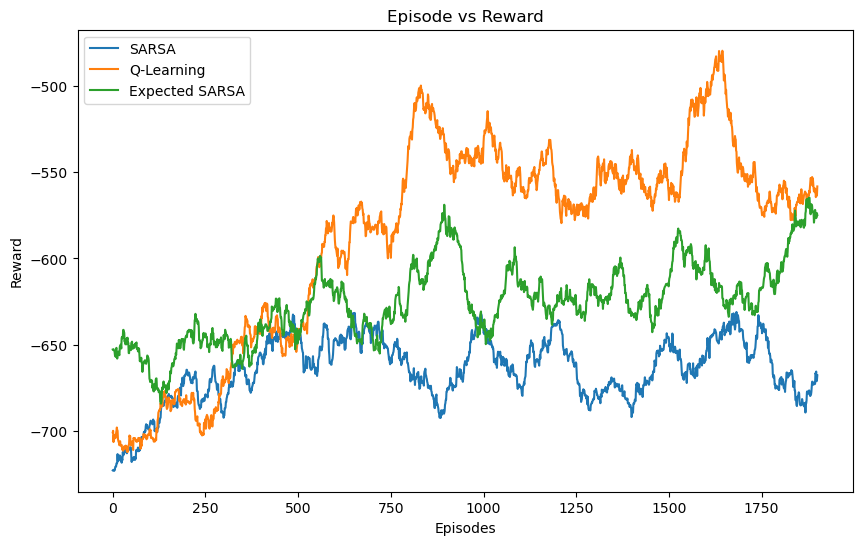

Avg Reward of SARSA =  -665.9425
Avg Reward of Q Learning =  -588.4395
Avg Reward of Expected SARSA =  -625.3835


Q-Learning performed better with an average reward of -588.4395


In [6]:
# Importing necessary libraries
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create the Taxi-v3 environment
env = gym.make('Taxi-v3')

# Define the Q-table dimensions
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
alpha = 0.4  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.9  # Exploration rate

# Lists to store the rewards for each episode
sarsa_rewards = []
q_learning_rewards = []
expected_sarsa_rewards = []

# Function to choose an action using epsilon-greedy policy
def choose_action(state, q_table, epsilon):
    if np.random.uniform() < epsilon:
        # Explore: Choose a random action
        action = env.action_space.sample()
    else:
        # Exploit: Choose the action with maximum Q-value
        action = np.argmax(q_table[state, :])
    return action

# SARSA
def sarsa(episodes):
    for episode in range(episodes):
        state = env.reset()
        action = choose_action(state, q_table, epsilon)
        done = False
        episode_reward = 0

        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = choose_action(next_state, q_table, epsilon)
            q_table[state, action] += alpha * (reward + gamma * q_table[next_state, next_action] - q_table[state, action])
            state = next_state
            action = next_action
            episode_reward += reward

        sarsa_rewards.append(episode_reward)

# Q-Learning
def q_learning(episodes):
    for episode in range(episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = choose_action(state, q_table, epsilon)
            next_state, reward, done, _ = env.step(action)
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])
            state = next_state
            episode_reward += reward

        q_learning_rewards.append(episode_reward)

# Expected SARSA
def expected_sarsa(episodes):
    for episode in range(episodes):
        state = env.reset()
        action = choose_action(state, q_table, epsilon)
        done = False
        episode_reward = 0

        while not done:
            next_state, reward, done, _ = env.step(action)
            expected_value = 0
            for next_action in range(env.action_space.n):
                expected_value += q_table[next_state, next_action] * (1 / env.action_space.n)
            q_table[state, action] += alpha * (reward + gamma * expected_value - q_table[state, action])
            action = choose_action(next_state, q_table, epsilon)
            state = next_state
            episode_reward += reward

        expected_sarsa_rewards.append(episode_reward)

# Function to calculate moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# Function to compare the algorithms
def compare_algorithms(sarsa_rewards, q_learning_rewards, expected_sarsa_rewards):
    """
    Compare the performance of SARSA, Q-Learning, and Expected SARSA algorithms.

    Parameters:
        sarsa_rewards (list): List of rewards obtained by SARSA algorithm.
        q_learning_rewards (list): List of rewards obtained by Q-Learning algorithm.
        expected_sarsa_rewards (list): List of rewards obtained by Expected SARSA algorithm.
    """
    sarsa_avg = sum(sarsa_rewards) / len(sarsa_rewards)
    q_learning_avg = sum(q_learning_rewards) / len(q_learning_rewards)
    expected_sarsa_avg = sum(expected_sarsa_rewards) / len(expected_sarsa_rewards)
    
    print("Avg Reward of SARSA = ", sarsa_avg)
    print("Avg Reward of Q Learning = ", q_learning_avg)
    print("Avg Reward of Expected SARSA = ", expected_sarsa_avg)
    
    print("\n")

    best_algorithm = max(sarsa_avg, q_learning_avg, expected_sarsa_avg)

    if best_algorithm == sarsa_avg:
        print("SARSA performed better with an average reward of", sarsa_avg)
    elif best_algorithm == q_learning_avg:
        print("Q-Learning performed better with an average reward of", q_learning_avg)
    else:
        print("Expected SARSA performed better with an average reward of", expected_sarsa_avg)

# Run the algorithms
episodes = 2000
window_size = 100  # Moving average window size
sarsa(episodes)
q_learning(episodes)
expected_sarsa(episodes)

# Calculate moving averages
sarsa_ma = moving_average(sarsa_rewards, window_size)
q_learning_ma = moving_average(q_learning_rewards, window_size)
expected_sarsa_ma = moving_average(expected_sarsa_rewards, window_size)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sarsa_ma, label='SARSA')
plt.plot(q_learning_ma, label='Q-Learning')
plt.plot(expected_sarsa_ma, label='Expected SARSA')
plt.title('Average Rewards Over Episodes (Moving Average)')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)
plt.show()

# Compare the algorithms
compare_algorithms(sarsa_rewards, q_learning_rewards, expected_sarsa_rewards)

## Environment Overview:

The environment in reinforcement learning represents the problem that an agent interacts with. In this code, the environment used is the Taxi-v3 environment from OpenAI's Gym. The Taxi-v3 environment is a classic discrete environment where a taxi navigates a small grid-world, picking up and dropping off passengers.

## Policies:

### Epsilon-Greedy Policy:

The epsilon-greedy policy balances exploration and exploitation during action selection.

**Description:** With a probability of ε, the agent selects a random action (exploration), allowing it to discover new states. With a probability of (1-ε), the agent selects the action with the highest Q-value (exploitation), aiming to maximize rewards.

### Action Selection Policies (SARSA, Q-Learning, Expected SARSA):

#### SARSA (State-Action-Reward-State-Action):

**Description:** SARSA updates the Q-values based on the observed state-action-reward transitions. It learns directly from the agent's experience, updating Q-values for state-action pairs. The next action is selected using the same policy that was used to choose the current action.

#### Q-Learning:

**Description:** Q-Learning is an off-policy learning algorithm that learns the optimal action-value function independent of the agent's actions. It updates Q-values based on the maximum Q-value of the next state, regardless of the next action. This allows Q-Learning to converge to the optimal policy regardless of the agent's exploration strategy.

#### Expected SARSA:

**Description:** Expected SARSA is an on-policy learning algorithm similar to SARSA but calculates the expected value of the next state-action pair. Instead of using the Q-value of the next state-action pair, it computes the expected value across all possible actions. Expected SARSA typically converges faster than SARSA because it considers the expected value of the next state-action pair.


## Why Q-Learning Outperforms SARSA and Expected SARSA

Q-Learning, SARSA, and Expected SARSA are three classic reinforcement learning algorithms used for learning optimal policies. While all three algorithms have their strengths and weaknesses, Q-Learning often outperforms SARSA and Expected SARSA in certain scenarios due to its unique characteristics:

1. **Off-Policy Learning:**
   Q-Learning is an off-policy learning algorithm, meaning it learns the optimal policy while following a different (often exploratory) policy. This allows Q-Learning to prioritize learning from the maximum Q-value of the next state-action pair, even if it doesn't correspond to the action taken according to the current policy. This characteristic can lead to more efficient exploration and learning of the optimal policy.

2. **Greedy Policy Improvement:**
   Q-Learning uses a greedy policy improvement strategy by always selecting the action with the maximum Q-value for a given state. This approach ensures that Q-Learning continually updates its Q-values toward the optimal policy without being influenced by the exploration strategy. Consequently, Q-Learning tends to converge to the optimal policy more efficiently in deterministic environments.

3. **Simplified Implementation:**
   Compared to SARSA and Expected SARSA, Q-Learning has a simpler update rule, as it directly updates the Q-values based on the maximum Q-value of the next state-action pair. This simplicity often leads to faster convergence and ease of implementation in various environments.

4. **Potential Pitfalls of SARSA and Expected SARSA:**
   SARSA and Expected SARSA are on-policy learning algorithms, meaning they update their Q-values based on the action actually taken in the next state. This can lead to slower convergence, especially in scenarios where exploration might not efficiently lead to the optimal policy. Additionally, Expected SARSA introduces additional complexity due to its computation of the expected value of the next state-action pair.

**Conclusion:**
While Q-Learning tends to outperform SARSA and Expected SARSA in certain scenarios due to its off-policy learning, greedy policy improvement, and simplified implementation, the choice of algorithm depends on the specific characteristics of the environment and the learning objectives. It's essential to experiment with different algorithms and tune hyperparameters to achieve optimal performance in reinforcement learning tasks.